## 전출 비율로 구해보기

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [4]:
df = pd.read_csv("../../Data/03.통합.csv")
df

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7
...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4


In [25]:
df['전출비율'] = df['전출인구'] / df['총인구']
df.head()

df1 = df[['출생아수',	'산부인과의원수',	'초등학생인원수',	'도매 및 소매업 신생', '전출비율']]
df1

,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,전출비율
0,112129,286,739619,49143,0.148865
1,84066,395,469392,48097,0.159769
2,29504,65,190166,12612,0.127141
3,25831,82,160821,13902,0.140650
4,19340,86,136309,9981,0.145197
...,...,...,...,...,...
131,8607,40,85135,6103,0.141452
132,7481,44,79807,6405,0.166283
133,7835,32,73478,5554,0.141231
134,3989,23,40575,2856,0.140426


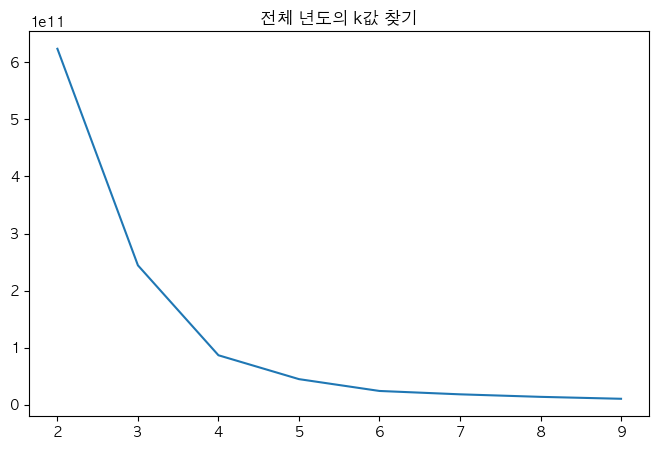

In [26]:
from sklearn.cluster import KMeans
df_temp = df1.copy()
# df_temp.set_index('시도', inplace=True)
# df_km = df_temp[df_temp.columns.difference(['총인구'])] # 총인구 컬럼이 존재할 때 사용한 것임
df_km = df_temp
# k값 찾기 --------------------------------------------
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_km)
    scores.append(km.inertia_)
# 그래프 그리기 ------------------
plt.figure(figsize=(8,5))
plt.plot(range(2,10), scores)
plt.title('전체 년도의 k값 찾기')
plt.show()
# -----------------------------

In [27]:
data_points = df_km.values
km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!

print(km.labels_)
df_km['cluster_id'] = km.labels_
# 각 군집의 중심위치
km.cluster_centers_

[2 1 3 3 3 3 0 3 0 3 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0 3 0 0 0 0 0 0 0 2 1 3
 3 3 3 0 3 0 3 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0 3 0 0 0 0 0 0 0 2 1 3 3 3 3
 0 3 0 3 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0 3 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0
 3 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0 3 0 0 0 0 0 0 0]


array([[9.47140278e+03, 3.25277778e+01, 7.31160278e+04, 5.00900000e+03,
        1.42533721e-01],
       [6.88623750e+04, 3.90250000e+02, 4.37333375e+05, 4.58475000e+04,
        1.62877694e-01],
       [9.83292500e+04, 2.71375000e+02, 7.43822500e+05, 5.25488750e+04,
        1.44673431e-01],
       [1.99309375e+04, 6.37500000e+01, 1.46102250e+05, 1.07974375e+04,
        1.34670000e-01]])

In [28]:
df_km

,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,전출비율,cluster_id
0,112129,286,739619,49143,0.148865,2
1,84066,395,469392,48097,0.159769,1
2,29504,65,190166,12612,0.127141,3
3,25831,82,160821,13902,0.140650,3
4,19340,86,136309,9981,0.145197,3
...,...,...,...,...,...,...
131,8607,40,85135,6103,0.141452,0
132,7481,44,79807,6405,0.166283,0
133,7835,32,73478,5554,0.141231,0
134,3989,23,40575,2856,0.140426,0


In [29]:
df_km['cluster_id'] = df_km['cluster_id'] + 10
df_km_temp = df_km.sort_values(by='전출비율', ascending=True)
temp_list = df_km_temp['cluster_id'].unique()

i = 3
for temp in temp_list:
    df_km['cluster_id'][df_km['cluster_id'] == temp] = i
    i-=1
df_km['cluster_id'] = np.round(df_km['cluster_id'] / 3, 2)
df_km['cluster_id'].unique()

array([0.33, 0.  , 1.  , 0.67])

In [30]:
# Feature, Target
data = df_km[['출생아수',	'산부인과의원수',	'초등학생인원수',	'도매 및 소매업 신생', '전출비율']].to_numpy()
target = df_km['cluster_id'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target
    
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # random_state=42

In [31]:
# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1) # default:100 # random_state=42
rf.fit(sub_input, sub_target)

print("Train score :", rf.score(sub_input, sub_target))
print("Valid score :", rf.score(val_input, val_target))

Train score : 0.9954330744678147
Valid score : 0.9961645546576681


In [32]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, train_input, train_target)
# 교차검증 후의 정확도 판단
np.mean(scores['test_score'])

0.9870313177199748

In [35]:
df

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,전출비율
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,0.148865
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,0.159769
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,0.127141
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,0.140650
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,0.145197
...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5,0.141452
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4,0.166283
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2,0.141231
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4,0.140426


In [39]:
df_all = pd.concat([df[['년도', '시도']], df_km], axis=1)
df_all

,년도,시도,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,전출비율,cluster_id
0,2013,경기도,112129,286,739619,49143,0.148865,0.33
1,2013,서울특별시,84066,395,469392,48097,0.159769,0.00
2,2013,경상남도,29504,65,190166,12612,0.127141,1.00
3,2013,부산광역시,25831,82,160821,13902,0.140650,1.00
4,2013,대구광역시,19340,86,136309,9981,0.145197,1.00
...,...,...,...,...,...,...,...,...
131,2020,충청북도,8607,40,85135,6103,0.141452,0.67
132,2020,대전광역시,7481,44,79807,6405,0.166283,0.67
133,2020,강원도,7835,32,73478,5554,0.141231,0.67
134,2020,제주특별자치도,3989,23,40575,2856,0.140426,0.67


In [45]:
df_all[df_all['시도'] == '서울특별시']

,년도,시도,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,전출비율,cluster_id
1,2013,서울특별시,84066,395,469392,48097,0.159769,0.0
18,2014,서울특별시,83711,392,457517,50223,0.164445,0.0
35,2015,서울특별시,83005,389,450675,44599,0.172287,0.0
52,2016,서울특별시,75536,388,436121,44997,0.166743,0.0
69,2017,서울특별시,65389,388,428333,44574,0.159415,0.0
86,2018,서울특별시,58074,394,424800,41812,0.158714,0.0
103,2019,서울특별시,53673,391,422293,42897,0.151718,0.0
120,2020,서울특별시,47445,385,409536,49581,0.169932,0.0


In [47]:
df_all.iloc[0,0]

2013

In [54]:
pred_cluster = []

for i in range(len(df_all)):
    pred_cluster.append(rf.predict([[df_all.iloc[i,2], df_all.iloc[i,3], df_all.iloc[i,4], 
            df_all.iloc[i,5], df_all.iloc[i,6]]]))

df_all['pred_cluster'] = pred_cluster
df_all

,년도,시도,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,전출비율,cluster_id,pred_cluster
0,2013,경기도,112129,286,739619,49143,0.148865,0.33,[0.30359999999999926]
1,2013,서울특별시,84066,395,469392,48097,0.159769,0.00,[0.0264]
2,2013,경상남도,29504,65,190166,12612,0.127141,1.00,[1.0]
3,2013,부산광역시,25831,82,160821,13902,0.140650,1.00,[1.0]
4,2013,대구광역시,19340,86,136309,9981,0.145197,1.00,[1.0]
...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,8607,40,85135,6103,0.141452,0.67,[0.6700000000000013]
132,2020,대전광역시,7481,44,79807,6405,0.166283,0.67,[0.6700000000000013]
133,2020,강원도,7835,32,73478,5554,0.141231,0.67,[0.6700000000000013]
134,2020,제주특별자치도,3989,23,40575,2856,0.140426,0.67,[0.6700000000000013]


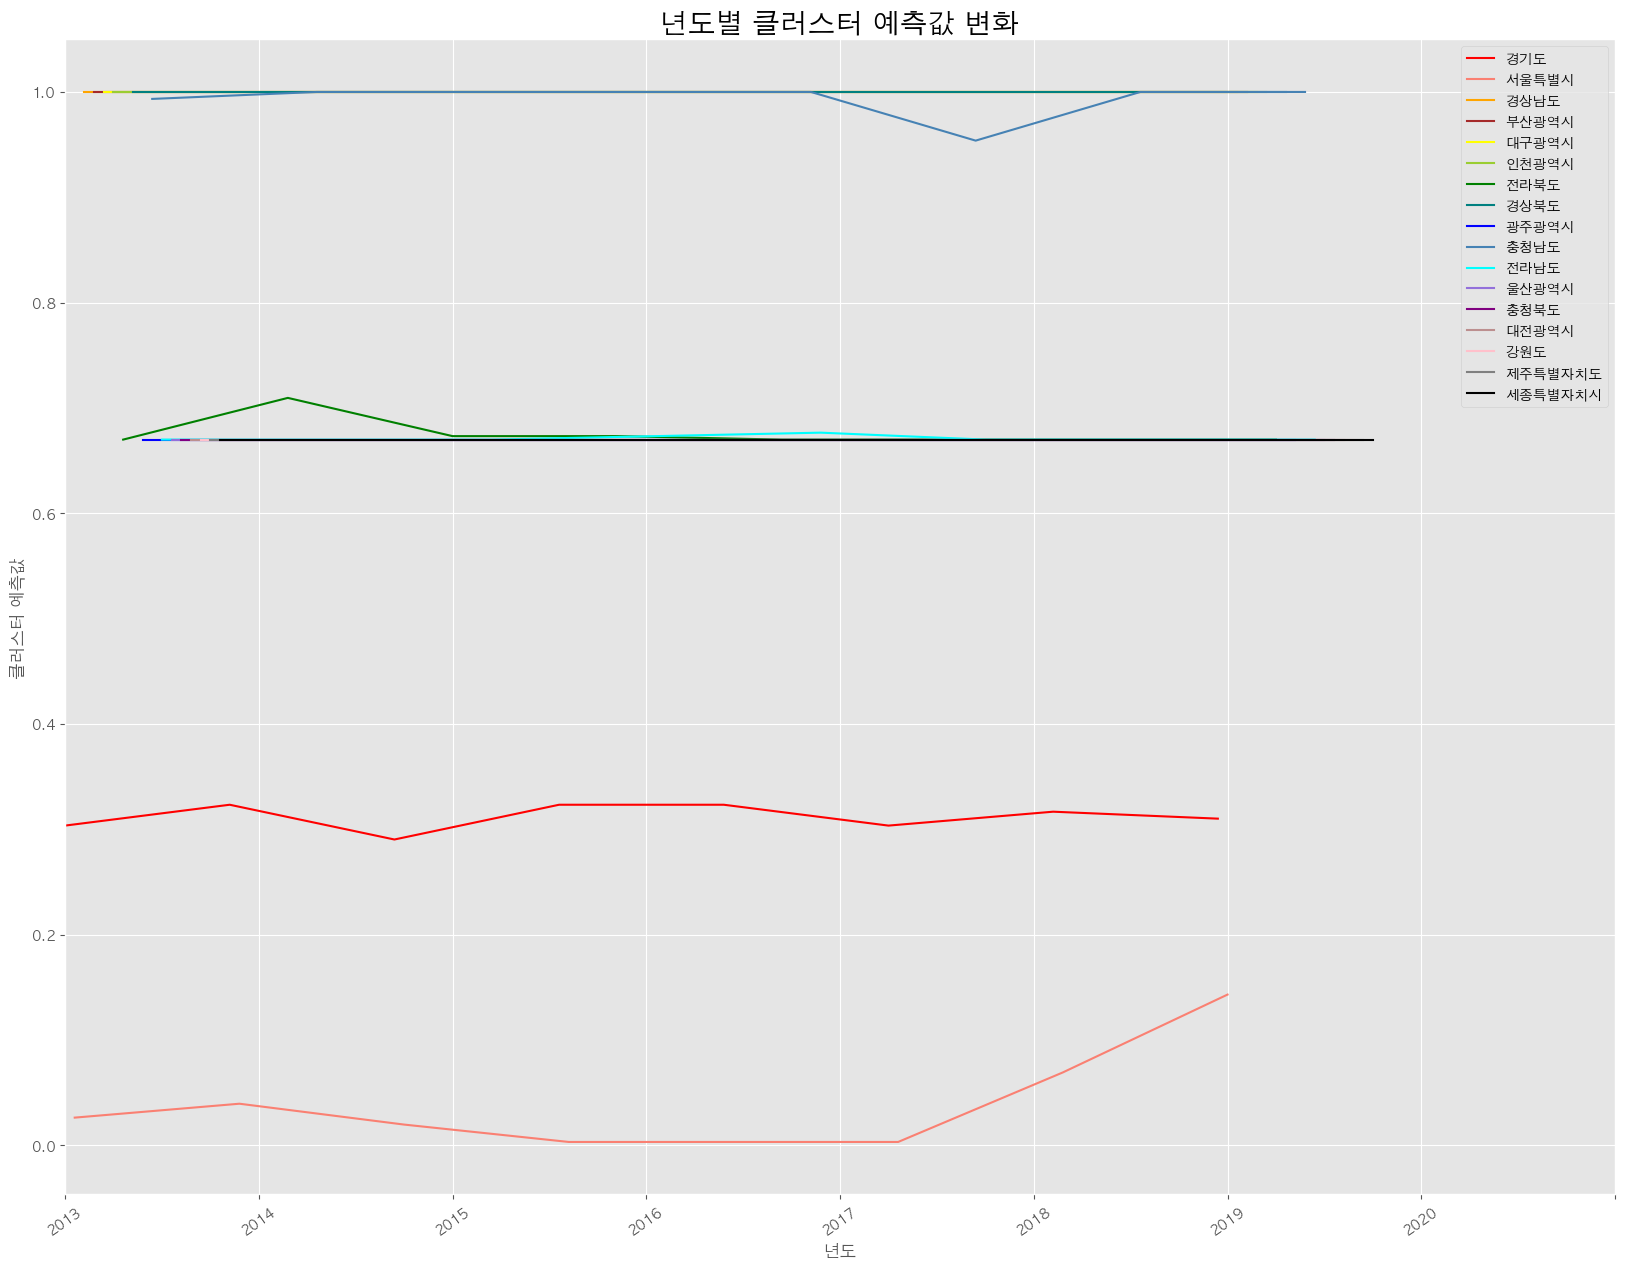

In [55]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

sido = pd.unique(df_all.시도)
colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue', 'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray','black']

for i in range(len(sido)):
    
    ax.plot(
        df_all[df_all['시도'] == sido[i]]['pred_cluster'],
        label=sido[i],
        color=colors[i]
    )

ax.legend(loc='best', fontsize=10)
ax.set_xlim(0,160)
ax.set_title('년도별 클러스터 예측값 변화', size=20)
ax.set_ylabel('클러스터 예측값')
ax.set_xlabel('년도')
ax.set_xticklabels(pd.unique(df_all.년도), rotation=35)

plt.show()

---
### 다중회귀

In [56]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print("Train score:", lr.score(train_input, train_target))
print("Test score:", lr.score(test_input, test_target))

Train score: 0.5690969795589751
Test score: 0.5336018308386172
